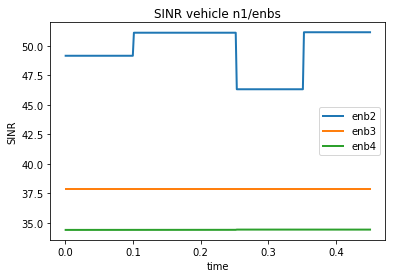

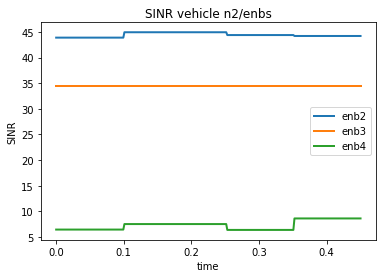

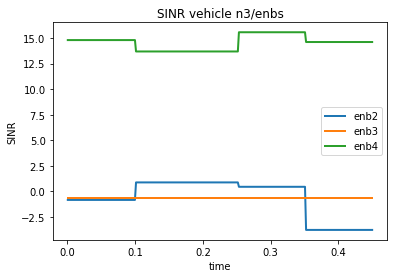

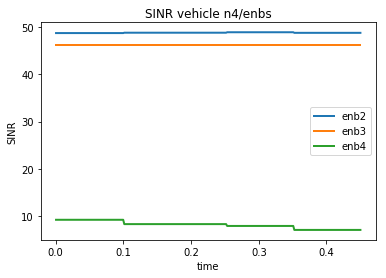

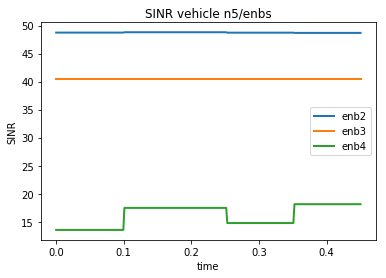

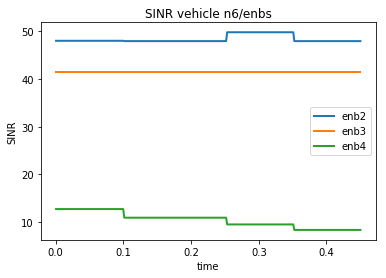

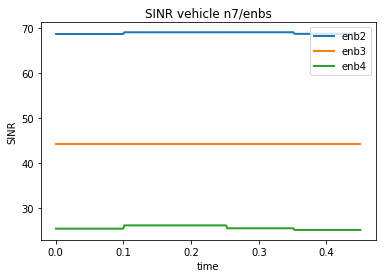

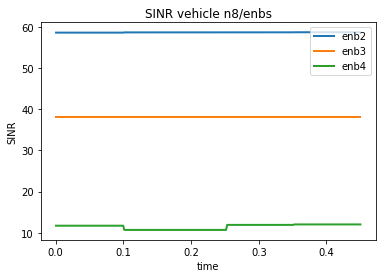

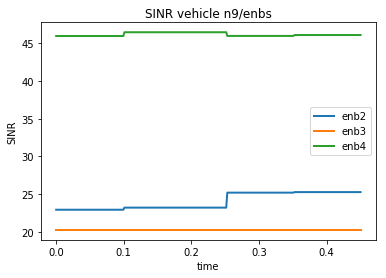

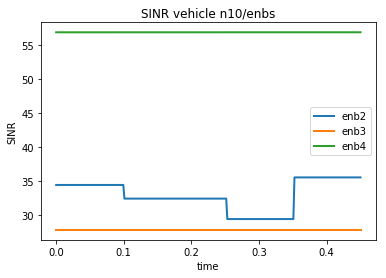

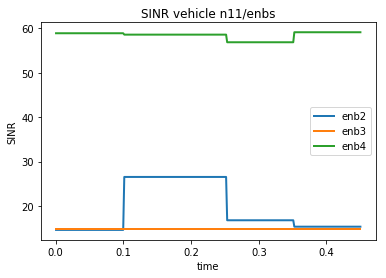

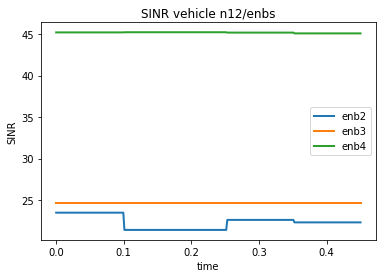

In [45]:
import numpy as np

file_name = "ns3-mmwave/output/hhMmWaveSinrTime_5_10_15_12_2017_07_26_15.txt"
infile = open(file_name,'r')
line_c = 0

num_vehicles = 12;
num_mmenbs = 3;
num_records = 10152/3/num_vehicles;

matrix = np.zeros((num_vehicles,num_mmenbs,num_records))
x = np.zeros(num_records)

for line in infile:
    v = line.split(' ')
    #print line
    veh = int(v[1])-1
    enb = int(v[2])-2
    matrix[veh,enb,line_c/3/num_vehicles] = v[3]
    if(line_c%(3*num_vehicles)==0):
        x[line_c/(3*num_vehicles)] = v[0]
    #print veh, enb, v[3]
    #print  matrix[veh,enb,line_c%num_vehicles]
    line_c += 1
infile.close()
#print x

import matplotlib.pyplot as plt

for i in range(num_vehicles):
#to obtain control on the axis of the figure, so to customize laberls, limits, etc.
    ax1 = plt.gca()
    #ax1.set_xlim(0, num_records)
#set limit on y-axis
#ax1.set_ylim(-0.1, 3)
    plt.title("SINR vehicle n"+str(i+1)+"/enbs")
    plt.xlabel("time")
    plt.ylabel('SINR')
    #x = range(0,num_records)
    plt.plot(x,matrix[i,0,:], lw=2)
    plt.plot(x,matrix[i,1,:], lw=2)
    plt.plot(x,matrix[i,2,:], lw=2)
    plt.legend(['enb2','enb3','enb4'])
    plt.show()